In [50]:
#import nltk
#import keras 
#import tensorflow 
#from keras import punctuator as kpunc 
import re
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer
#from nltk.stem.wordnet import WordNetLemmatizer, wordnet
#nltk.download('wordnet')
#from sklearn import datasets, feature_extraction, decomposition
import pandas as pd
from gensim.models.wrappers import LdaMallet


In [51]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()


In [52]:
quespy = pd.read_csv('question_py_2020.csv',error_bad_lines=False)
quespy['id'] = quespy.index
quesjs = pd.read_csv('question_js_2020.csv',error_bad_lines=False)
quesjs['id'] = quesjs.index

In [53]:
import gensim
from gensim.utils import simple_preprocess


# Put source data into list
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

pywords = list(sent_to_words(quespy['title'].values.tolist()))
jswords = list(sent_to_words(quesjs['title'].values.tolist()))

# remove stop words
stop_set = set(stopwords.words('english'))
pywords = [[word for word in doc if word not in stop_set] for doc in pywords]
jswords = [[word for word in doc if word not in stop_set] for doc in jswords]



In [54]:
import preprocess2
py_dictionary = gensim.corpora.Dictionary(pywords)
py_vecs = preprocess2.docs2vecs(pywords,py_dictionary)

js_dictionary = gensim.corpora.Dictionary(jswords)
js_vecs = preprocess2.docs2vecs(jswords,js_dictionary)

In [75]:
py_lda = gensim.models.ldamodel.LdaModel(corpus=py_vecs, id2word=py_dictionary, num_topics=8)
# js_lda = gensim.models.ldamodel.LdaModel(corpus=js_vecs, id2word=js_dictionary, num_topics=10)

C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-

C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-

C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-

C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Python\lib\site-

In [76]:
py_visual= pyLDAvis.gensim.prepare(py_lda, py_vecs, py_dictionary)
# js_visual= pyLDAvis.gensim.prepare(js_lda, js_vecs, js_dictionary)
pyLDAvis.save_html(py_visual, "topic_viz.html")
# pyLDAvis.save_html(js_visual, "topic_viz.html")

C:\Python\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [55]:
import gensim
import os
os.environ.update({'MALLET_HOME':r'C:/Softwares/mallet-2.0.8/'})

mallet_path = r'C:\Softwares\mallet-2.0.8\bin\mallet'

no_topics = 20

In [56]:
from gensim.models import CoherenceModel

py_model_list = []
py_coherence_values = []
py_model_topics = []

for num_topics in range(2, no_topics, 2):
    py_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=py_vecs, num_topics=no_topics, id2word=py_dictionary)
    coherencemodel = CoherenceModel(model=py_lda_x, texts=pywords, dictionary=py_dictionary, coherence='c_v')
    py_model_topics.append(num_topics)
    py_model_list.append(py_lda_x)
    py_coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))


#Topics: 2 Score: 0.4570886252810634
#Topics: 4 Score: 0.4412424557428049
#Topics: 6 Score: 0.42313040255643336
#Topics: 8 Score: 0.43699618564680875
#Topics: 10 Score: 0.44236040766016516
#Topics: 12 Score: 0.4266775856764474
#Topics: 14 Score: 0.44961847981027914
#Topics: 16 Score: 0.4134616204323236
#Topics: 18 Score: 0.40864297884757567


In [77]:
# js_model_list = []
# js_coherence_values = []
# js_model_topics = []

# for num_topics in range(2, no_topics, 2):
#     js_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=js_vecs, num_topics=no_topics, id2word=js_dictionary)
#     coherencemodel = CoherenceModel(model=js_lda_x, texts=jswords, dictionary=js_dictionary, coherence='c_v')
#     js_model_topics.append(num_topics)
#     js_model_list.append(js_lda_x)
#     js_coherence_values.append(coherencemodel.get_coherence())
#     print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))


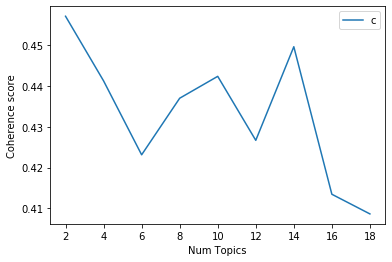

In [58]:
# Show graph
import matplotlib.pyplot as plt

limit=no_topics; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, py_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [78]:
# # Show graph
# import matplotlib.pyplot as plt

# limit=no_topics; start=2; step=2;
# x = range(start, limit, step)
# plt.plot(x, js_coherence_values)
# plt.xlabel("Num Topics")
# plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
# plt.show()

In [72]:
# LDA Mallet model
py_ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = py_vecs,iterations = 1000, num_topics=8, id2word = py_dictionary) 

# Convert LDA Mallet model to LDA model before conducting visualisation
py_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(py_ldamallet)

# Show Topics
py_vecTop= py_ldamallet.show_topics(-1,num_words = 20)
for i in range(0,8):
    print(py_vecTop[i])

C:\Python\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(0, '0.154*"python" + 0.053*"string" + 0.019*"image" + 0.019*"make" + 0.019*"output" + 0.016*"strings" + 0.016*"replace" + 0.016*"specific" + 0.013*"print" + 0.012*"split" + 0.011*"check" + 0.010*"numbers" + 0.009*"join" + 0.009*"result" + 0.009*"characters" + 0.008*"id" + 0.008*"display" + 0.008*"xml" + 0.008*"network" + 0.007*"form"')
(1, '0.088*"data" + 0.031*"convert" + 0.028*"model" + 0.027*"django" + 0.026*"table" + 0.024*"tensorflow" + 0.021*"keras" + 0.020*"type" + 0.016*"method" + 0.016*"input" + 0.015*"frame" + 0.014*"filter" + 0.012*"module" + 0.011*"datetime" + 0.010*"custom" + 0.010*"pytorch" + 0.010*"size" + 0.010*"typeerror" + 0.009*"test" + 0.009*"int"')
(2, '0.098*"python" + 0.065*"file" + 0.026*"csv" + 0.021*"files" + 0.017*"google" + 0.016*"run" + 0.015*"script" + 0.015*"api" + 0.014*"read" + 0.013*"save" + 0.011*"user" + 0.009*"directory" + 0.009*"jupyter" + 0.008*"path" + 0.008*"write" + 0.008*"command" + 0.008*"notebook" + 0.008*"functions" + 0.008*"reading" + 0.0

In [79]:
# # LDA Mallet model
# js_ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = js_vecs,iterations = 1000, num_topics=7, id2word = js_dictionary) 

# # Convert LDA Mallet model to LDA model before conducting visualisation
# js_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(js_ldamallet)

# # Show Topics
# js_vecTop= js_ldamallet.show_topics(-1,num_words = 20)
# for i in range(0,7):
#     print(js_vecTop[i])

In [ ]:
# py_perplex= py_lda.log_perplexity(py_vecs, total_docs=None)
# js_perplex= js_lda.log_perplexity(py_vecs, total_docs=None)

# print('\nPerplexity for LDAModel: ', py_perplex)
# print('\nPerplexity for LDAModel: ', js_perplex)

In [ ]:
# # Compute Coherence Score
# from gensim.models import CoherenceModel
# py_coherence_model_ldamallet = CoherenceModel(model=py_ldamallet, texts=py_docs, dictionary=py_dictionary, coherence='c_v')
# py_coherence_ldamallet = py_coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score LDAMallet: ', py_coherence_ldamallet)

# py_coherence_model_lda = CoherenceModel(model=py_lda, texts=py_docs, dictionary=py_dictionary, coherence='c_v')
# py_coherence_lda = py_coherence_model_lda.get_coherence()
# print('\nCoherence Score DAModel: ', py_coherence_lda)

In [ ]:
# # Compute Coherence Score
# from gensim.models import CoherenceModel
# js_coherence_model_ldamallet = CoherenceModel(model=js_ldamallet, texts=js_docs, dictionary=js_dictionary, coherence='c_v')
# js_coherence_ldamallet = py_coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score LDAMallet: ', py_coherence_ldamallet)

# js_coherence_model_lda = CoherenceModel(model=js_lda, texts=js_docs, dictionary=js_dictionary, coherence='c_v')
# js_coherence_lda = js_coherence_model_lda.get_coherence()
# print('\nCoherence Score DAModel: ', js_coherence_lda)

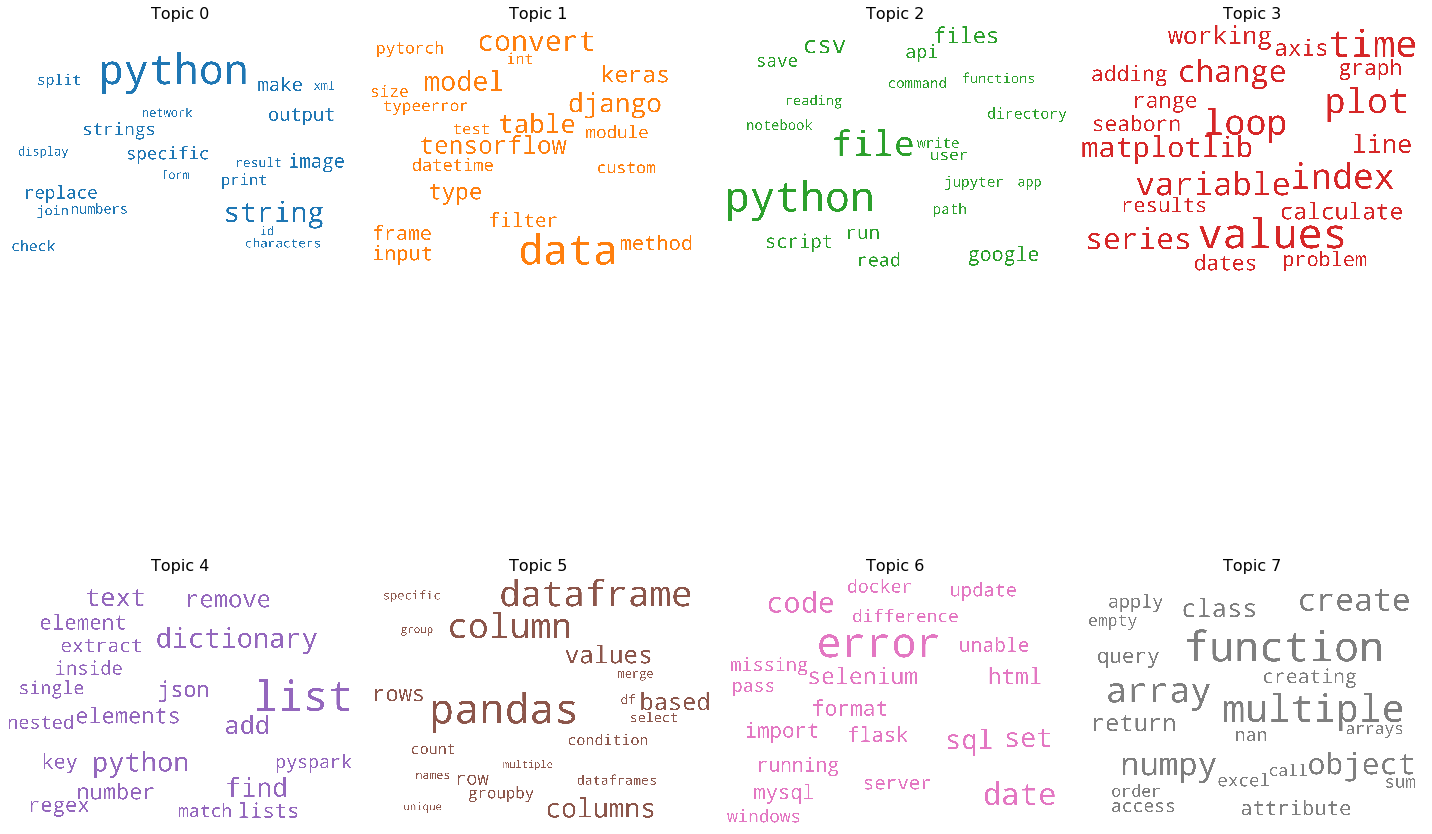

In [74]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

py_topics = py_ldamallet.show_topics(-1,num_words = 20,formatted = False)

fig, axes = plt.subplots(2,4,figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    py_topic_words = dict(py_topics[i][1])
    cloud.generate_from_frequencies(py_topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [80]:


# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# cloud = WordCloud(background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=20,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# js_topics = js_ldamallet.show_topics(-1,num_words = 20,formatted = False)

# fig, axes = plt.subplots(7,1,figsize=(20,20), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     js_topic_words = dict(js_topics[i][1])
#     cloud.generate_from_frequencies(js_topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')

# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

In [81]:
#Find most dominant topic

# import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

#df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=sg_vecs, data=sg_docs)
py_df_topic_sents_keywords = format_topics_sentences(ldamodel=py_ldamallet, corpus=py_vecs, data=pywords)

# Format
py_df_dominant_topic = py_df_topic_sents_keywords.reset_index()
py_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
py_df_dominant_topic.head(10)

py_df_dominant_topic.to_csv('Data with topic python.csv', index=False)


C:\Python\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [69]:
# js_df_topic_sents_keywords = format_topics_sentences(ldamodel=py_ldamallet, corpus=py_vecs, data=pywords)
# # Format
# js_df_dominant_topic = js_df_topic_sents_keywords.reset_index()
# js_df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
# js_df_dominant_topic.head(10)

# js_df_dominant_topic.to_csv('Data with topic js.csv', index=False)